# Medical Cost Project
***
***

# Goals
***
- Draw insights about what drives medical charges
- Create a machine learning model that can effectively predict medical costs

# Setup
***

In [1]:
# establishing environment
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Acquire
Acquiring the data for this project
***

In [2]:
# acquiring data from local csv
df = pd.read_csv('insurance.csv')

In [3]:
# previewing df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# checking for null, data types, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Acquire Takeaway

- Acquired data from local csv file

# Prepare
Preparing the data for exploration and modeling

### Creating boolean columns for categorical variables

In [5]:
# creating dummy columns
df_dummies = pd.get_dummies(df, columns = ['sex', 'region' , 'smoker'], prefix = ['is','region', 'smoker'])

# renaming smoker column to match other binary column
df_dummies.rename(columns = {'smoker_yes' : 'is_smoker'}, inplace=True)

# resetting df indices otherwise merge causes extra rows to be created
df_dummies.reset_index(inplace = True)
df.reset_index(inplace = True)

# merging dummy df with main df
df = df.merge(df_dummies, how = 'inner')

# dropping these columns since their information is stored in counterpart column since they are binary values in this case
# ie. only male and female in data, if patient not female, must be male
# ie. if patient is a smoker, they must not be a non-smoker
# also dropping index here since passing drop argument to reset_index function also causes new row creation
df = df.drop(columns = ['is_male', 'smoker_no', 'index'])

df.head()

,age,sex,bmi,children,smoker,region,charges,is_female,region_northeast,region_northwest,region_southeast,region_southwest,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1,0,0,0


### Scale appropriate numerical columns

In [6]:
# creating scaler object
scaler = sklearn.preprocessing.MinMaxScaler()

# fitting scaler to various columns and adding scaled versions of each to DF
df['age_s'] = scaler.fit_transform(df[['age']])
df['bmi_s'] = scaler.fit_transform(df[['bmi']])
df['children_s'] = scaler.fit_transform(df[['children']])

### Moving target variable, charges, to end of df

In [7]:
# removing charges column from df and saving as variable
charges = df.pop('charges')
    
# adding back charges columns to end of DF
df['charges'] = charges

### Splitting dataframe in Train, Validate, and Test samples

In [8]:
# splitting data
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

### Previewing Train, Validate, and Test samples

In [9]:
train.head()

,age,sex,bmi,children,smoker,region,is_female,region_northeast,region_northwest,region_southeast,region_southwest,is_smoker,age_s,bmi_s,children_s,charges
1310,42,male,26.315,1,no,northwest,0,0,1,0,0,0,0.521739,0.278585,0.2,6940.90985
1264,49,female,33.345,2,no,northeast,1,1,0,0,0,0,0.673913,0.467716,0.4,10370.91255
1258,55,male,37.715,3,no,northwest,0,0,1,0,0,0,0.804348,0.585284,0.6,30063.58055
1311,33,female,26.695,0,no,northwest,1,0,1,0,0,0,0.326087,0.288808,0.0,4571.41305
1040,35,female,28.025,0,yes,northwest,1,0,1,0,0,1,0.369565,0.324590,0.0,20234.85475


In [10]:
validate.head()

,age,sex,bmi,children,smoker,region,is_female,region_northeast,region_northwest,region_southeast,region_southwest,is_smoker,age_s,bmi_s,children_s,charges
1222,50,male,25.300,0,no,southeast,0,0,0,1,0,0,0.695652,0.251278,0.0,8442.66700
287,63,female,26.220,0,no,northwest,1,0,1,0,0,0,0.978261,0.276029,0.0,14256.19280
994,27,female,20.045,3,yes,northwest,1,0,1,0,0,1,0.195652,0.109900,0.6,16420.49455
646,39,male,26.220,1,no,northwest,0,0,1,0,0,0,0.456522,0.276029,0.2,6123.56880
377,24,male,40.150,0,yes,southeast,0,0,0,1,0,1,0.130435,0.650794,0.0,38126.24650


In [11]:
test.head()

,age,sex,bmi,children,smoker,region,is_female,region_northeast,region_northwest,region_southeast,region_southwest,is_smoker,age_s,bmi_s,children_s,charges
650,49,female,42.680,2,no,southeast,1,0,0,1,0,0,0.673913,0.718859,0.4,9800.88820
319,32,male,37.335,1,no,northeast,0,1,0,0,0,0,0.304348,0.575061,0.2,4667.60765
314,27,female,31.400,0,yes,southwest,1,0,0,0,1,1,0.195652,0.415389,0.0,34838.87300
150,35,male,24.130,1,no,northwest,0,0,1,0,0,0,0.369565,0.219801,0.2,5125.21570
336,60,male,25.740,0,no,southeast,0,0,0,1,0,0,0.913043,0.263115,0.0,12142.57860


### Checking Train, Validate, Test DF dimensions

In [12]:
train.shape, validate.shape, test.shape

((749, 16), (321, 16), (268, 16))

## Exploration Takeaways

__The following changes were made to the data__

- Scale non-target variable numerical columns
    - age
    - bmi
    - children

- Create boolean columns for categorical variables
    - sex
    - smoker
    - region

- Split data in train, validate, test sets

__Notes__

- No nulls to address

- Data types are appropriate for the operations I intend to perform on them

# Explore
Exploring the data to identify drivers of medical costs and variables that can be used as features in my model
***

## General Exploration

### Creating pairplot to see general relationships between all non-region variables

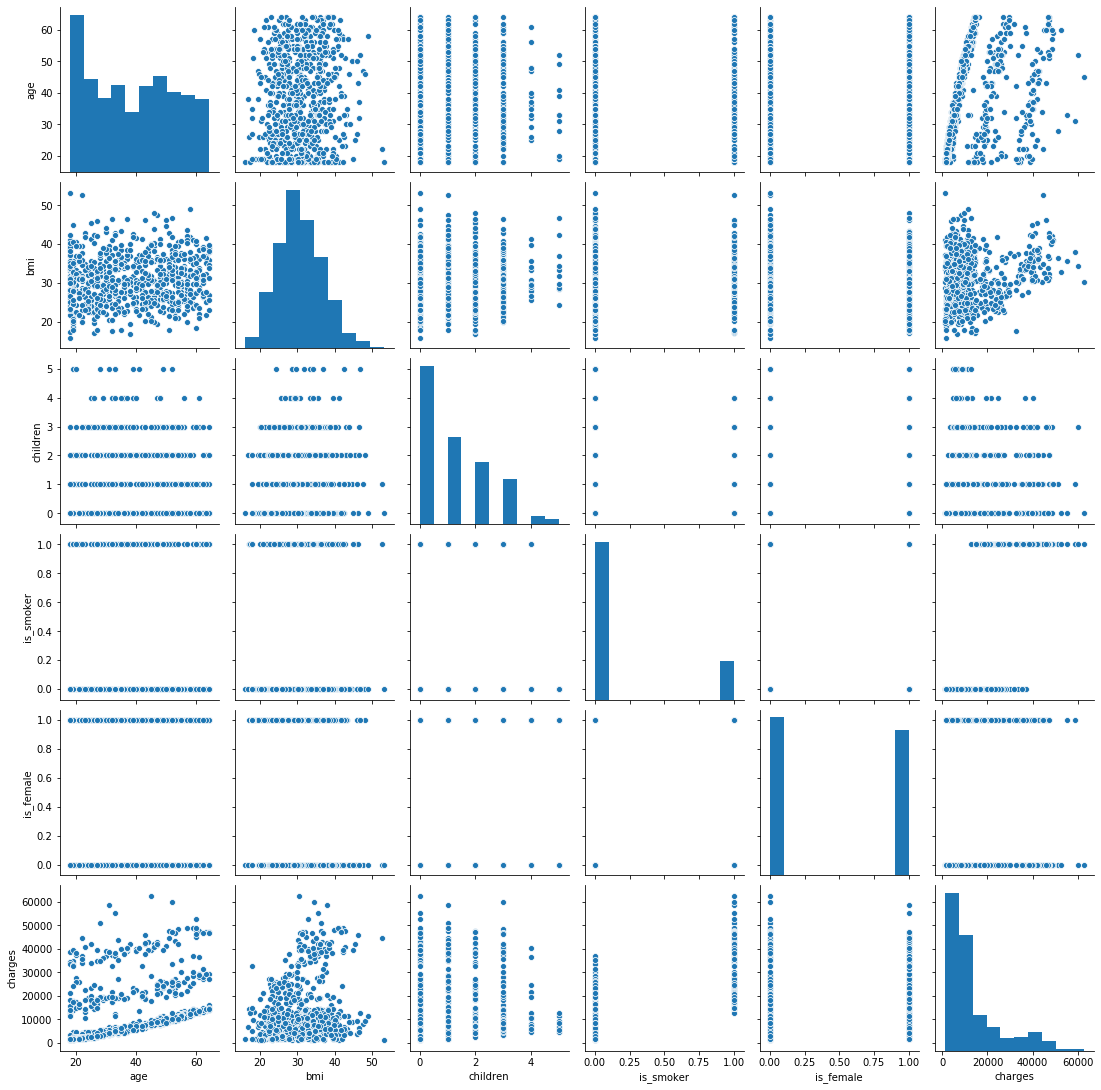

In [13]:
# creating df that only contains columns I want in pairplot
pairplot_df = train[['age', 'bmi', 'children', 'is_smoker', 'is_female', 'charges']]

# creating pairplot
sns.pairplot(pairplot_df)

__Age & Charges__
- Appear to be 3 distinct groups
    - 0 to 10k charges (points very close to each other)
    - 10k to 30k charges (points close but not as concentrated as 0 to 10k group)
    - 30k to 50k charges (visible grouping but weakest concentration)
- As age increases, so do charges

__Age & Children__
- Most patients appear to have 3 or less children

__Age & BMI__
- No discernable relationship

__BMI & Children__
- Most patients appear to have 3 or less children

__BMI & Charges__
- 30 to 45 BMI range appears to hold most of the higher charges

__Children & Charges__
- Patients with 5 children appear to have the lowest charges 

__Is_Smoker__
- No discernably strong relationships
- Ratio of smokers to non-smokers may vary significantly among genders and/or regions and is not discernable by these plots but I'll be examining their relationships more closely in a set of bar plots below

__Is_Female__
- No discernably strong relationships
- Ratio of male to female may vary significantly among smoker status and/or regions and is not discernable by these plots but I'll be examining their relationships more closely in a set of bar plots below

### Creating pairplot to see general relationships between all region variables and target variable, charges

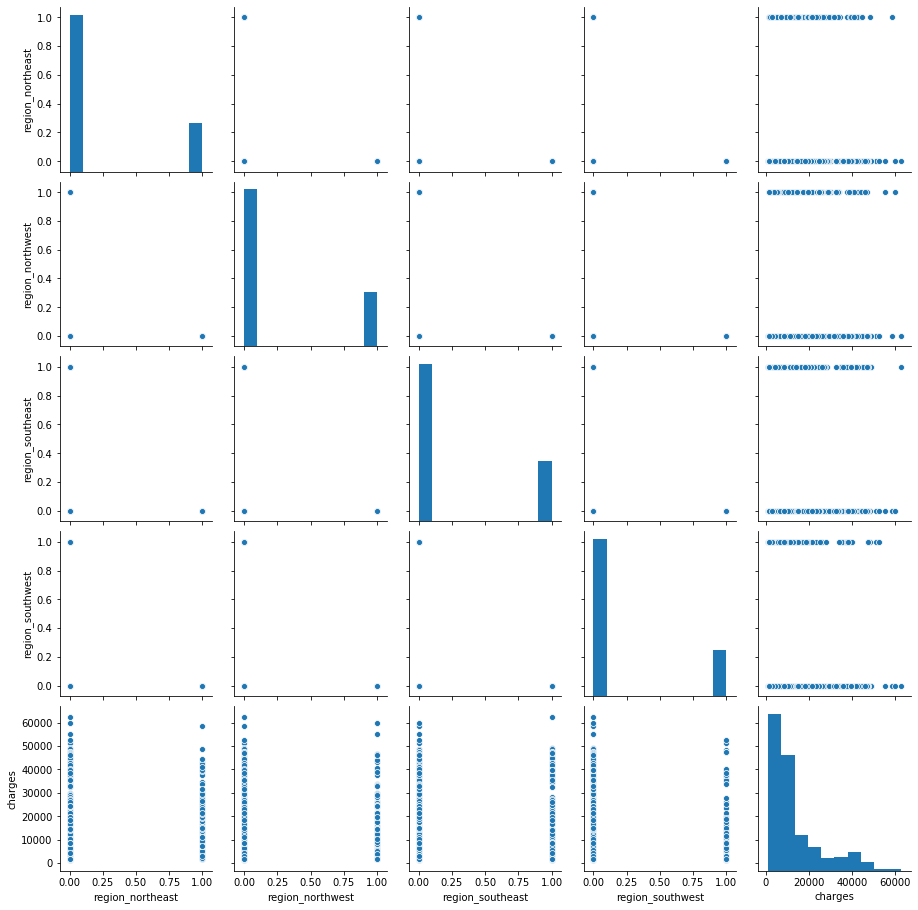

In [14]:
# creating df that only contains columns I want in pairplot
pairplot_df2 = train[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']]

# creating pairplot
sns.pairplot(pairplot_df2)

__Charges & Regions__
- No discernablely strong relationships between regions and charges

### Creating barplots to more closely examine relationships between the categorical variables of sex, smoker status and region since the pairplots above wouldn't allow me to do so.

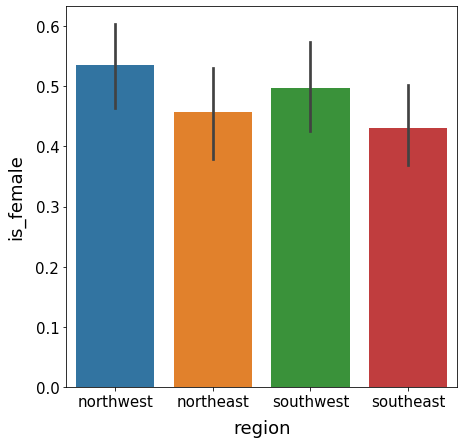

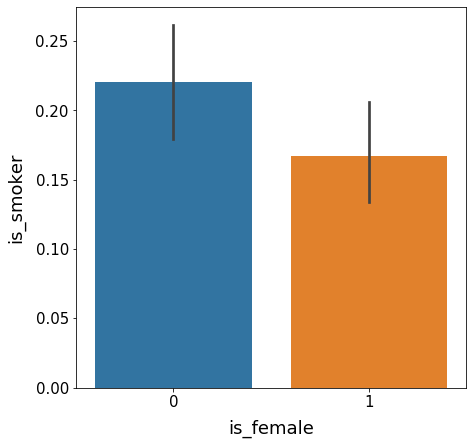

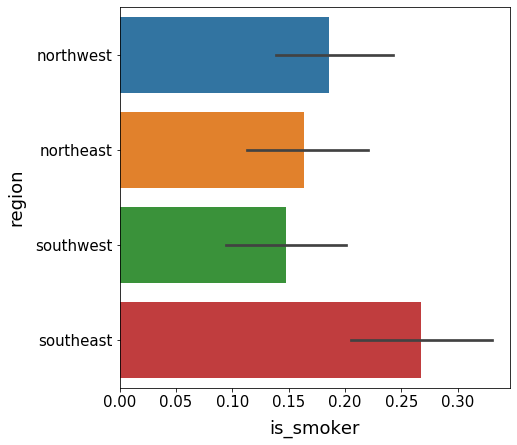

In [15]:
# filtering for only categorical columns
categorical_cols = train[['region', 'is_female', 'is_smoker']]

# setting counter for loop
counter = 1

# for loop creates barplots using every unique combination of variables
for col in categorical_cols.columns:
    if counter < len(categorical_cols.columns):
        plt.figure(figsize = (7,7))
        sns.barplot(data = categorical_cols, x = col, y = categorical_cols.iloc[:, categorical_cols.columns.get_loc(col)+1])
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.xlabel(f'{col}', fontsize=18, labelpad = 10)
        plt.ylabel(f'{categorical_cols.columns[categorical_cols.columns.get_loc(col)+1]}', fontsize=18, labelpad = 10)
        plt.show()
        counter += 1
    elif counter == len(categorical_cols.columns):
        plt.figure(figsize = (7,7))
        sns.barplot(data = categorical_cols, x = col, y = categorical_cols.iloc[:,0])
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.xlabel(f'{col}', fontsize = 18, labelpad = 10)
        plt.ylabel(f'{categorical_cols.columns[0]}', fontsize = 18, labelpad = 10)
        plt.show()
        counter += 1
    else:
        break

__Region & Gender__
- Females make up roughly 40-50% of the observations within each region

__Smoker & Gender__
- Roughly 5% more men smoke than women

__Region & Smoker__
- The southeast region has at least ~10% more smokers than any other region

### Creating a heatmap that includes each feature

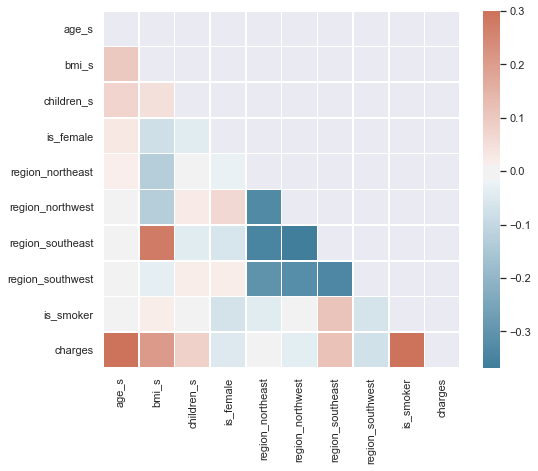

In [21]:
# setting figure size
sns.set(rc={'figure.figsize':(8,8)})

# specifying columns for heatmap
heatmap_df = train[['age_s', 'bmi_s', 'children_s', 'is_female', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'is_smoker', 'charges']]

# Compute the correlation matrix
corr = heatmap_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square = True, linewidths=.5, cbar_kws={"shrink": .82})

The variables with the strongest correlations to charges appear to be
- age
- bmi
- is_smoker

## Focused Exploration: Age
### Visualization: Age

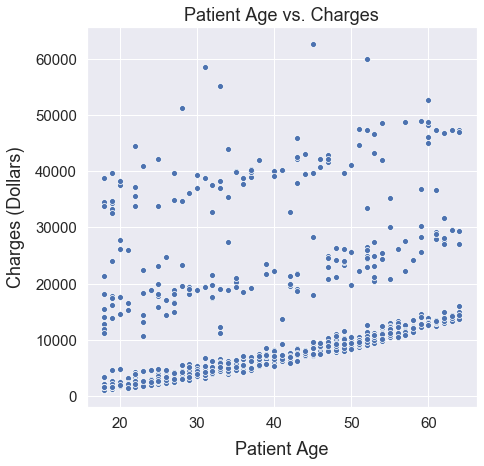

In [18]:
# creating scatterplot of age vs charges
plt.figure(figsize = (7,7))
sns.scatterplot(data = train, x = train.age, y = train.charges)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Patient Age', fontsize = 18, labelpad = 10)
plt.ylabel('Charges (Dollars)', fontsize = 18, labelpad = 10)
plt.title('Patient Age vs. Charges', fontsize = 18)

plt.show()

- 3 groups
    - 0 to 10k charges (points very close to each other)
    - 10k to 30k charges (points close but not as concentrated as 0 to 10k group)
    - 30k to 50k charges (visible grouping but weakest concentration)
    - As age increases, so do the charges within each group
    
    
- It's possible the groups are 3 different healthcare plans

### Hypothesis Test: Age
Performing a pearson correlation test to see if there is a linear relationship between age and charges

H0: There is no linear relationship between age and charges 
<br>
Ha: There is a linear relationship between age and charges 

In [29]:
# performing pearson correlation test
corr, p = stats.pearsonr(train.age, train.charges)

# printing correlation coefficient and p value
print(f'alpha =                   0.05')
print(f'p =                       {p}')
print(f'correlation coeffecient = {corr}')

alpha =                   0.05
p =                       1.5635998069997362e-18
correlation coeffecient = 0.3133990600038662


- Since p is less than alpha I reject the null hypothesis that there is no linear relationship between age and charges
- Given the correlation coeffecient of .31, I conclude that there is a moderate, positive relationship between the variables.
    - In other words, generally speaking, as one variable increases, so does the other
- This may be a solid variable to use as a feature in modeling

## Focused Exploration: BMI
### Visualization: BMI

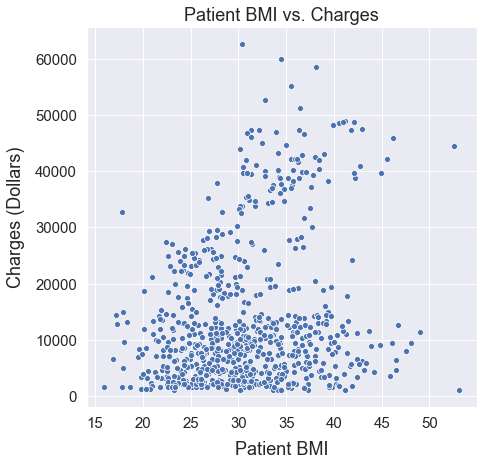

In [24]:
# creating scatterplot of bmi vs charges
plt.figure(figsize = (7,7))
sns.scatterplot(data = train, x = train.bmi, y = train.charges)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Patient BMI', fontsize = 18, labelpad = 10)
plt.ylabel('Charges (Dollars)', fontsize = 18, labelpad = 10)
plt.title('Patient BMI vs. Charges', fontsize = 18)

plt.show()

- 30 to 45 BMI range appears to hold most of the higher charges
- Only 1 patient below 25 BMI had more than 30000 in charges

### Hypothesis Test: BMI
Performing a pearson correlation test to see if there is a linear relationship between age and charges
<br>
<br>
H0: There is no linear relationship between BMI and charges 
<br>
Ha: There is a linear relationship between BMI and charges 

In [28]:
# performing pearson correlation test
corr, p = stats.pearsonr(train.bmi, train.charges)

# printing correlation coefficient and p value
print(f'alpha =                   0.05')
print(f'p =                       {p}')
print(f'correlation coeffecient = {corr}')

alpha =                   0.05
p =                       1.0838135248037468e-08
correlation coeffecient = 0.20697648494728077


- Since p is less than alpha, I reject the null hypothesis that there is no linear relationship between BMI and charges
- Given the correlation coeffecient of .20, I conclude that there is a moderate, positive relationship between the variables.
    - In other words, generally speaking, as one variable increases, so does the other
- This may be a solid variable to use as a feature in modeling

## Focused Exploration: Number of children
### Visualization: Number of children

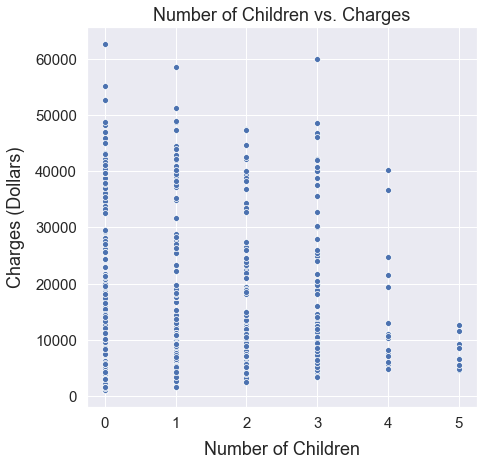

In [32]:
# creating scatterplot of number of children vs charges
plt.figure(figsize = (7,7))
sns.scatterplot(data = train, x = train.children, y = train.charges)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Number of Children', fontsize = 18, labelpad = 10)
plt.ylabel('Charges (Dollars)', fontsize = 18, labelpad = 10)
plt.title('Number of Children vs. Charges', fontsize = 18)

plt.show()

- Range of charges doesn't change too much until 5 children
    - Small range at 5 children could be due to the fact that there aren't many patients with 5 children so my sample may not be representing the distribution of charges for patients with 5 children very accurately

### Hypothesis Test: Number of children
Performing a pearson correlation test to see if there is a linear relationship between the number of children a patient has and charges
<br>
<br>
H0: There is no linear relationship between number of children and charges 
<br>
Ha: There is a linear relationship between number of children and charges 

In [36]:
# performing pearson correlation test
corr, p = stats.pearsonr(train.children, train.charges)

# printing correlation coefficient and p value
print(f'alpha =                   0.05')
print(f'p =                       {p}')
print(f'correlation coeffecient = {corr}')

alpha =                   0.05
p =                       0.02536384577198803
correlation coeffecient = 0.08169478213369147


- Since p is less than alpha, I reject the null hypothesis that there is no linear relationship between number of children and charges
- Given the correlation coeffecient of .08, I conclude that the relationship between the variables is so weak that it is nearly non-existent (since the coefficient is so close to 0)
    - In light of this, this variable probably won't be a good feature for modeling

## Focused Exploration: Gender
### Visualization: Gender

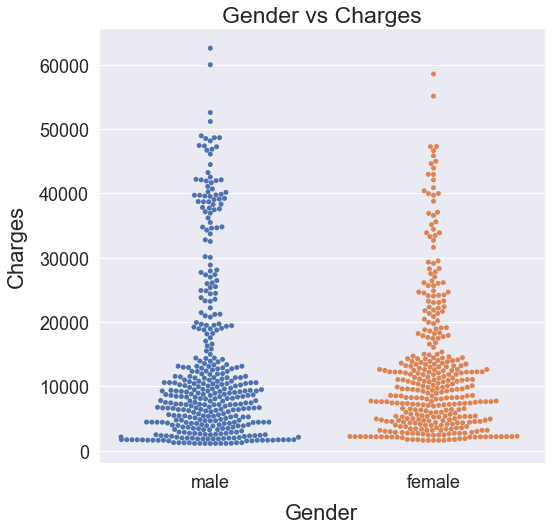

In [75]:
# creating swarmplot of gender vs charges
gender_df = train[['sex', 'charges']]
gender_df.columns = ['Gender', 'Charges']
plt.xlabel('Gender', fontsize = 22, labelpad = 12)
plt.ylabel('Charges (Dollars)', fontsize = 22, labelpad = 12)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gender vs Charges', fontsize = 23)
sns.swarmplot(data = gender_df, x = 'Gender', y = 'Charges')

### Hypothesis Test: Gender
Performing a two-sample, two-tailed t-test, to see if there is a significant difference between the average charges of men and women.
<br>
<br>
H0: The average charges of men = The average charges of women
<br>
Ha: The average charges of men != The average charges of women

In [82]:
male_df = train[train.sex == 'male']
female_df = train[train.sex == 'female']

t, p = stats.ttest_ind(male_df.charges, female_df.charges, equal_var = False)

print(f'alpha =                   0.05')
print(f'p =                       {p}')

alpha =                   0.05
p =                       0.17455815652159026


- Since p is greater than alpha, I fail to reject the null hypothesis
- The result of this test is evidence that there is no significant difference between the average charges of men and women

## Focused Exploration: Region
### Visualization: Region

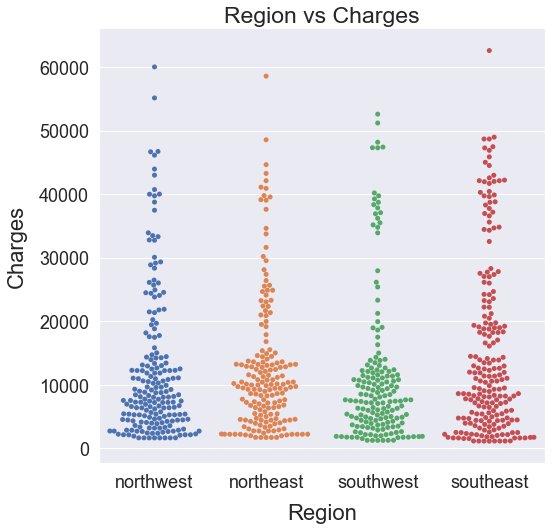

In [83]:
# creating swarmplot of region vs charges
gender_df = train[['region', 'charges']]
gender_df.columns = ['Region', 'Charges']
plt.xlabel('Region', fontsize = 22, labelpad = 12)
plt.ylabel('Charges (Dollars)', fontsize = 22, labelpad = 12)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Region vs Charges', fontsize = 23)
sns.swarmplot(data = gender_df, x = 'Region', y = 'Charges')

- Distribution of charges between each region seem fairly similar
- The southeast appears to have a few more patients with charges above 60000 